<a href="https://colab.research.google.com/github/SChiu-project/CUSCS-m3/blob/main/Class3_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

Decision Tree Pros

- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

Decision Tree Cons

- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

## Classification

In [ ]:
from sklearn import tree
X = [[0, 0], [1, 1], [3, 3], [4, 4]]
Y = [0, 0, 1, 1]
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X, Y)

In [ ]:
predict = dtc.predict([[2.5, 2.5]])
print(predict)

[1]


In [ ]:
# the probability of each class
predict = dtc.predict_proba([[2.5, 2.5]])
print(predict)

[[0. 1.]]


In [ ]:
predict = dtc.predict_proba([[2, 2]])
print(predict)

[[1. 0.]]


## iris

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X, y)
predict = dtc.predict(X)
print(y)
print(predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y, predict)
print(accuracy)

1.0


[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

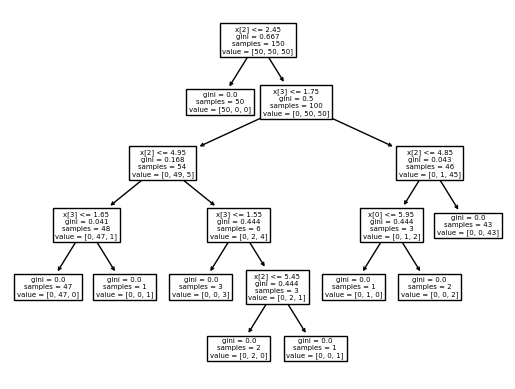

In [ ]:
tree.plot_tree(dtc)

## Graphviz

We can also export the tree in Graphviz format using the export_graphviz exporter.

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
dot_data = tree.export_graphviz(dtc, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Textual format

The tree can also be exported in textual format with the function export_text. This method doesn’t require the installation of external libraries and is more compact:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



## Regression

In [ ]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

## Example 2

Pima Indians Diabetes Database
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
# import numpy
import numpy as np

# import pandas
import pandas as pd

# import matplotlab
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn
import seaborn as sns

In [ ]:
##############
### sklearn core
import sklearn

# import train test split from sklearn
from sklearn.model_selection import train_test_split

# data
from sklearn.datasets import fetch_california_housing

# validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# data preprocessing
# necessary to reduce biases of large numbers
from sklearn.preprocessing import StandardScaler

In [ ]:
### tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# load dataset
df = pd.read_csv("diabetes.csv")
print(df.shape)
print(df.info())
print(df.describe())
print(df.describe().round(2).T)
print(df.head())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479  

In [ ]:
col_names = df.columns
print(col_names)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
print(col_names)

# change all columns to lowercase
col_names = [col_name.lower() for col_name in col_names]
print(col_names)

# change last column name to label
col_names = col_names[:-1] + ['label']
print(col_names)

['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'label']
['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'label']
['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'label']


In [ ]:
# load dataset
del df
df = pd.read_csv("diabetes.csv", header=0, names=col_names)

In [ ]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.describe().round(2).T)
print(df.head())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   label                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       pregnancies     glucose  bloodpressure  skinthickness     insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479  

In [ ]:
# split dataset in features and target variable
feature_cols = ['pregnancies', 'insulin', 'bmi', 'age','glucose','bloodpressure','diabetespedigreefunction']
X = df[feature_cols] # Features
y = df.label # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Check features
print(X.shape)
print(X.info())
print(X.describe())
print(X.describe().round(2).T)
print(X.head())

(768, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   insulin                   768 non-null    int64  
 2   bmi                       768 non-null    float64
 3   age                       768 non-null    int64  
 4   glucose                   768 non-null    int64  
 5   bloodpressure             768 non-null    int64  
 6   diabetespedigreefunction  768 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 42.1 KB
None
       pregnancies     insulin         bmi         age     glucose  \
count   768.000000  768.000000  768.000000  768.000000  768.000000   
mean      3.845052   79.799479   31.992578   33.240885  120.894531   
std       3.369578  115.244002    7.884160   11.760232   31.972618   
min       0.000000    0.000000    0.000000   21.000000  

### Build and train model

In [ ]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc.fit(X_train, y_train)

#Predict the response for test dataset
predict = dtc.predict(X_test)

In [ ]:
print(predict)

[0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]


### Evaluate model

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, predict))

Accuracy: 0.645021645021645


### Visualizing Decision Trees

[Text(0.40873579545454547, 0.96875, 'x[4] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(0.15021306818181818, 0.90625, 'x[2] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(0.045454545454545456, 0.84375, 'x[2] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(0.022727272727272728, 0.78125, 'x[0] <= 7.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.011363636363636364, 0.71875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.03409090909090909, 0.71875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06818181818181818, 0.78125, 'x[6] <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.056818181818181816, 0.71875, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.07954545454545454, 0.71875, 'x[6] <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.06818181818181818, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09090909090909091, 0.65625, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),

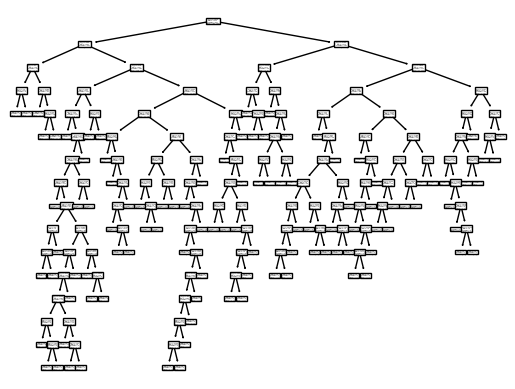

In [ ]:
from sklearn import tree
tree.plot_tree(dtc)

### Optimizing Decision Tree Performance

It's too messy and hard to read when you have too many nodes!

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand.

In the decision tree chart, each internal node has a decision rule that splits the data. Gini, referred to as Gini ratio, measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Let's optimize our tree by pruning:

- criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In [ ]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
dtc.fit(X_train, y_train)

#Predict the response for test dataset
predict = dtc.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.7575757575757576


The result is even better than too many nodes.

You may try entropy as the criterion and max depth to 4.

In [ ]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dtc.fit(X_train, y_train)

#Predict the response for test dataset
predict = dtc.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.7835497835497836
